In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('./data/occurrence_selected.txt')

In [3]:
df.head()

,decimalLatitude,decimalLongitude,waterBody,locality,countryCode,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,depth,target
0,-13.9387,-171.553,South Pacific Ocean,Taliga,WS,5.000000e-01,-8.660254e-01,0.965926,2.588190e-01,0.965926,0.258819,13.50,0
1,-13.9387,-171.553,South Pacific Ocean,Cowabunga,WS,1.224647e-16,-1.000000e+00,0.965926,2.588190e-01,0.965926,0.258819,10.20,0
2,-13.9387,-171.553,South Pacific Ocean,Cowabunga,WS,1.224647e-16,-1.000000e+00,1.000000,1.194340e-15,0.965926,0.258819,9.75,0
3,-13.9387,-171.553,South Pacific Ocean,Cowabunga,WS,5.000000e-01,-8.660254e-01,1.000000,1.194340e-15,0.965926,0.258819,10.50,0
4,53.8635,-166.049,Hidden Lake,Sunrise Grand Select Montemare Resort House Reef,EG,-1.000000e+00,-1.836970e-16,-0.500000,8.660254e-01,0.965926,-0.258819,10.00,0


In [4]:
df[df['countryCode'] == 'ES']

,decimalLatitude,decimalLongitude,waterBody,locality,countryCode,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,depth,target
3734,27.6840,-18.03990,Atlantic Ocean,El Desierto,ES,7.071068e-01,-0.707107,2.588190e-01,9.659258e-01,0.866025,-0.500000,12.40,0
3735,27.6489,-18.01280,Atlantic Ocean,Punta Las Cañas,ES,2.588190e-01,-0.965926,-2.449294e-16,1.000000e+00,0.866025,-0.500000,13.55,0
3736,27.6178,-17.99850,Atlantic Ocean,Roque La Mar,ES,-8.660254e-01,-0.500000,-8.660254e-01,-5.000000e-01,0.707107,-0.707107,14.50,0
3737,27.6349,-17.99850,Atlantic Ocean,Punta Lajial,ES,7.071068e-01,-0.707107,1.000000e+00,6.123234e-17,0.866025,-0.500000,18.50,0
3738,27.6176,-17.99200,Atlantic Ocean,El Puerto,ES,-7.071068e-01,0.707107,-2.588190e-01,-9.659258e-01,0.707107,-0.707107,6.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,39.6820,3.45438,Mediterranean Sea,Bahia Grande,ES,5.000000e-01,-0.866025,-2.588190e-01,-9.659258e-01,0.965926,0.258819,3.50,0
4901,39.9670,3.83420,Mediterranean Sea,Cala Blanca,ES,1.224647e-16,-1.000000,8.660254e-01,5.000000e-01,0.866025,-0.500000,7.50,1
4933,39.9387,3.96301,Mediterraneo,Malacolt,ES,5.000000e-01,-0.866025,2.588190e-01,-9.659258e-01,0.965926,-0.258819,19.00,1
4934,39.9394,3.96370,Mediterraneo,Isla Helmound,ES,5.000000e-01,-0.866025,8.660254e-01,-5.000000e-01,0.965926,-0.258819,10.00,0


In [5]:
X = df.drop(columns=['target'])
y = df['target']

In [6]:
#Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, stratify=y)

#Split in train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=33, stratify=y_train)

In [8]:
#Stardard scaler depth
sc = StandardScaler()
X_train['depth_s'] = sc.fit_transform(X_train[['depth']])
#X_validation['depth_s'] = sc.transform(X_validation[['depth']])

In [9]:
#Stardard scaler coordinates
X_train['decimalLatitude_s'] = sc.fit_transform(X_train[['decimalLatitude']])
#X_validation['decimalLatitude_s'] = sc.transform(X_validation[['decimalLatitude']])
X_train['decimalLongitude_s'] = sc.fit_transform(X_train[['decimalLongitude']])
#X_validation['decimalLongitude_s'] = sc.transform(X_validation[['decimalLongitude']])

In [10]:
X_train.head()

,decimalLatitude,decimalLongitude,waterBody,locality,countryCode,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,depth,depth_s,decimalLatitude_s,decimalLongitude_s
8912,10.11870,99.8152,Koh Tao,Japanese Gardens,TH,-0.258819,-0.965926,-2.449294e-16,1.000000,7.071068e-01,-0.707107,8.145,-0.292916,-0.347535,0.989638
9640,5.97309,116.0070,South China Sea,Manukan Reef,MY,0.258819,-0.965926,-8.660254e-01,-0.500000,5.000000e-01,0.866025,8.000,-0.326273,-0.529403,1.176365
5812,53.28370,13.4330,Dreetzsee,Dreetzsee,DE,-0.500000,-0.866025,7.071068e-01,0.707107,7.071068e-01,-0.707107,4.000,-1.246444,1.546120,-0.006539
1379,20.43100,-86.9081,Chankanaab National Park,Cedar Pass,MX,-0.707107,-0.707107,8.660254e-01,0.500000,1.224647e-16,-1.000000,8.500,-0.211251,0.104867,-1.163693
2299,36.95120,-77.7660,"Richmond, VA",Lake Rawlings,US,0.500000,-0.866025,-9.659258e-01,0.258819,5.000000e-01,-0.866025,7.620,-0.413689,0.829611,-1.058265


In [11]:
#Mean target encoder for categorical columns
def mean_target_encoder_fit(df, column, target):
    df['target'] = target
    m_dict = dict(df.groupby(column).mean()['target'])
    df.drop(columns='target', inplace=True)
    return m_dict

In [12]:
def mean_target_encoder_transform(df,column,m_dict):
    df[column+'_m'] = df[column].map(m_dict)
    df[column+'_m'].fillna(0, inplace=True)

In [13]:
waterBody_dict = mean_target_encoder_fit(X_train, 'waterBody', y_train)
locality_dict = mean_target_encoder_fit(X_train, 'locality', y_train)
countryCode_dict = mean_target_encoder_fit(X_train, 'countryCode', y_train)

In [14]:
mean_target_encoder_transform(X_train,'waterBody',waterBody_dict)
mean_target_encoder_transform(X_train,'locality',locality_dict)
mean_target_encoder_transform(X_train,'countryCode',countryCode_dict)
#mean_target_encoder_transform(X_validation,'waterBody',waterBody_dict)
#mean_target_encoder_transform(X_validation,'locality',locality_dict)
#mean_target_encoder_transform(X_validation,'countryCode',countryCode_dict)

In [15]:
#X_validation.drop(columns=['waterBody', 'locality', 'countryCode'], inplace=True)
X_train.drop(columns=['waterBody', 'locality', 'countryCode'], inplace=True)

X_validation.isna().sum()

In [17]:
X_train.columns

Index(['decimalLatitude', 'decimalLongitude', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos', 'depth', 'depth_s',
       'decimalLatitude_s', 'decimalLongitude_s', 'waterBody_m', 'locality_m',
       'countryCode_m'],
      dtype='object')

In [18]:
columns = ['waterBody_m', 'locality_m', 'countryCode_m',
           'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'depth_s']
X_train = X_train[columns]
X_validation = X_validation[columns]

In [19]:
X_train.head()

,waterBody_m,locality_m,countryCode_m,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,depth_s
8912,0.181818,0.0,0.185393,-0.258819,-0.965926,-2.449294e-16,1.000000,7.071068e-01,-0.707107,-0.292916
9640,0.121429,0.0,0.172043,0.258819,-0.965926,-8.660254e-01,-0.500000,5.000000e-01,0.866025,-0.326273
5812,0.000000,0.0,0.000000,-0.500000,-0.866025,7.071068e-01,0.707107,7.071068e-01,-0.707107,-1.246444
1379,0.250000,0.5,0.240000,-0.707107,-0.707107,8.660254e-01,0.500000,1.224647e-16,-1.000000,-0.211251
2299,0.000000,0.0,0.135593,0.500000,-0.866025,-9.659258e-01,0.258819,5.000000e-01,-0.866025,-0.413689


In [166]:
LogisticRegression?

In [168]:
GridSearchCV?

In [20]:
clf_lr = GridSearchCV(LogisticRegression(max_iter=1000),
                     param_grid={"class_weight":[None, 'balanced'],
                                 "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                 'C': np.arange(0.1, 1, .1)},
                     scoring='f1')
clf_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [21]:
clf_lr.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'newton-cg'}

In [58]:
pd.DataFrame(clf_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030406,0.020702,0.002746,0.000477,0.1,None,newton-cg,"{'C': 0.1, 'class_weight': None, 'solver': 'ne...",0.718310,0.683274,0.740741,0.738562,0.783784,0.732934,0.032736,87
1,0.012425,0.000925,0.002325,0.000102,0.1,None,lbfgs,"{'C': 0.1, 'class_weight': None, 'solver': 'lb...",0.718310,0.683274,0.740741,0.738562,0.783784,0.732934,0.032736,87
2,0.008550,0.000625,0.002257,0.000074,0.1,None,liblinear,"{'C': 0.1, 'class_weight': None, 'solver': 'li...",0.710801,0.692308,0.737864,0.745223,0.798658,0.736971,0.036204,86
3,0.012356,0.000923,0.002206,0.000018,0.1,None,sag,"{'C': 0.1, 'class_weight': None, 'solver': 'sag'}",0.718310,0.683274,0.740741,0.738562,0.783784,0.732934,0.032736,87
4,0.019473,0.001675,0.002804,0.000753,0.1,None,saga,"{'C': 0.1, 'class_weight': None, 'solver': 'sa...",0.718310,0.683274,0.740741,0.738562,0.783784,0.732934,0.032736,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.023086,0.001744,0.002569,0.000166,0.9,balanced,newton-cg,"{'C': 0.9, 'class_weight': 'balanced', 'solver...",0.758782,0.760494,0.766990,0.763033,0.771930,0.764246,0.004732,39
86,0.015798,0.001107,0.002516,0.000062,0.9,balanced,lbfgs,"{'C': 0.9, 'class_weight': 'balanced', 'solver...",0.760563,0.760494,0.766990,0.763033,0.771930,0.764602,0.004360,38
87,0.012381,0.000908,0.002685,0.000356,0.9,balanced,liblinear,"{'C': 0.9, 'class_weight': 'balanced', 'solver...",0.760563,0.760494,0.768856,0.761229,0.771930,0.764615,0.004824,37
88,0.020985,0.001259,0.002775,0.000326,0.9,balanced,sag,"{'C': 0.9, 'class_weight': 'balanced', 'solver...",0.758782,0.760494,0.766990,0.763033,0.771930,0.764246,0.004732,39


print(classification_report(y_validation, clf_lr.predict(X_validation)))

In [23]:
print(classification_report(y_train, clf_lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      4933
           1       0.68      0.89      0.77       881

    accuracy                           0.92      5814
   macro avg       0.83      0.91      0.86      5814
weighted avg       0.93      0.92      0.92      5814



In [24]:
confusion_matrix(y_validation, clf_lr.predict(X_validation))

array([[1504,  141],
       [ 218,   76]])

In [25]:
roc_auc_score(y_validation, clf_lr.predict_proba(X_validation)[:,1])

0.7290966234518124

Text(0, 0.5, 'tpr')

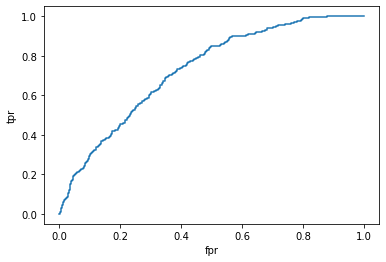

In [26]:
fpr, tpr, thresold = roc_curve(y_validation, clf_lr.predict_proba(X_validation)[:,1])
plt.plot(fpr, tpr);
plt.xlabel('fpr')
plt.ylabel('tpr')

In [27]:
(clf_lr.best_estimator_.coef_)

array([[ 1.36693056,  6.90515738,  0.97194767,  0.04639562,  0.17892758,
        -0.03727118,  0.02120761, -0.29932815,  0.03168767,  0.10183835]])

<BarContainer object of 10 artists>

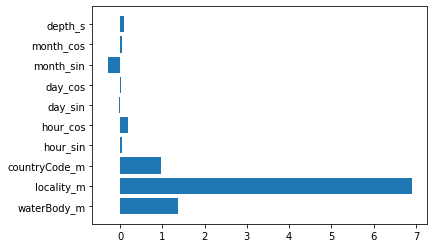

In [28]:
plt.barh(columns,clf_lr.best_estimator_.coef_[0])

In [29]:
clf_lrb = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'),
                     param_grid={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                'C': np.arange(0.1, 1, .1)})
clf_lrb.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [30]:
clf_lrb.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [31]:
print(classification_report(y_validation, clf_lrb.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1645
           1       0.35      0.26      0.30       294

    accuracy                           0.81      1939
   macro avg       0.61      0.59      0.60      1939
weighted avg       0.79      0.81      0.80      1939



In [32]:
print(classification_report(y_train, clf_lrb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      4933
           1       0.68      0.89      0.77       881

    accuracy                           0.92      5814
   macro avg       0.83      0.91      0.86      5814
weighted avg       0.93      0.92      0.92      5814



In [33]:
confusion_matrix(y_validation, clf_lrb.predict(X_validation))

array([[1504,  141],
       [ 218,   76]])

In [34]:
roc_auc_score(y_validation, clf_lrb.predict_proba(X_validation)[:,1])

0.7290966234518124

Text(0, 0.5, 'tpr')

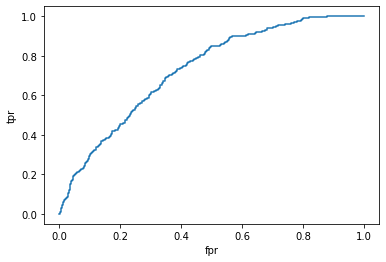

In [35]:
fpr, tpr, thresold = roc_curve(y_validation, clf_lrb.predict_proba(X_validation)[:,1])
plt.plot(fpr, tpr);
plt.xlabel('fpr')
plt.ylabel('tpr')

In [36]:
(clf_lr.best_estimator_.coef_)

array([[ 1.36693056,  6.90515738,  0.97194767,  0.04639562,  0.17892758,
        -0.03727118,  0.02120761, -0.29932815,  0.03168767,  0.10183835]])

<BarContainer object of 10 artists>

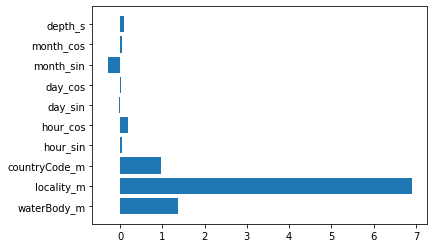

In [37]:
plt.barh(columns,clf_lrb.best_estimator_.coef_[0])

In [38]:
RandomForestClassifier?

In [39]:
clf_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid={"class_weight":[None, 'balanced'],
                                "criterion":['gini', 'entropy']})
clf_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy']})

In [40]:
clf_rf.best_params_

{'class_weight': None, 'criterion': 'entropy'}

In [41]:
print(classification_report(y_validation, clf_rf.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1645
           1       0.44      0.20      0.28       294

    accuracy                           0.84      1939
   macro avg       0.66      0.58      0.59      1939
weighted avg       0.80      0.84      0.81      1939



In [42]:
confusion_matrix(y_validation, clf_rf.predict(X_validation))

array([[1570,   75],
       [ 235,   59]])

In [43]:
roc_auc_score(y_validation, clf_rf.predict_proba(X_validation)[:,1])

0.6535667762545748

Text(0, 0.5, 'tpr')

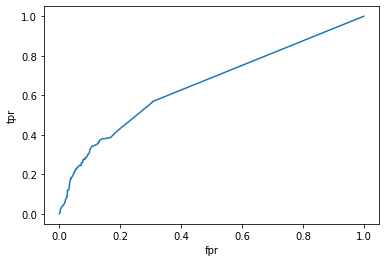

In [44]:
fpr, tpr, thresold = roc_curve(y_validation, clf_rf.predict_proba(X_validation)[:,1])
plt.plot(fpr, tpr);
plt.xlabel('fpr')
plt.ylabel('tpr')

In [45]:
clf_rfb = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                     param_grid={"criterion":['gini', 'entropy']})
clf_rfb.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy']})

In [46]:
clf_rfb.best_params_

{'criterion': 'gini'}

In [47]:
print(classification_report(y_validation, clf_rfb.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1645
           1       0.43      0.18      0.25       294

    accuracy                           0.84      1939
   macro avg       0.65      0.57      0.58      1939
weighted avg       0.80      0.84      0.81      1939



In [48]:
confusion_matrix(y_validation, clf_rfb.predict(X_validation))

array([[1576,   69],
       [ 241,   53]])

In [49]:
roc_auc_score(y_validation, clf_rfb.predict_proba(X_validation)[:,1])

0.6275220726588507

Text(0, 0.5, 'tpr')

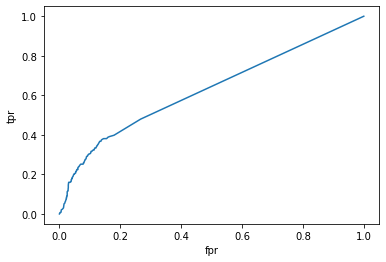

In [50]:
fpr, tpr, thresold = roc_curve(y_validation, clf_rfb.predict_proba(X_validation)[:,1])
plt.plot(fpr, tpr);
plt.xlabel('fpr')
plt.ylabel('tpr')

In [51]:
KNeighborsClassifier?

In [52]:
clf_kn = GridSearchCV(KNeighborsClassifier(),
                     param_grid={'n_neighbors': np.arange(2, 50, 1),
                                 'weights' : ['uniform', 'distance']},
                     scoring='f1')
clf_kn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [53]:
clf_kn.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [54]:
print(classification_report(y_validation, clf_kn.predict(X_validation)))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1645
           1       0.44      0.13      0.20       294

    accuracy                           0.84      1939
   macro avg       0.65      0.55      0.55      1939
weighted avg       0.80      0.84      0.80      1939



In [55]:
confusion_matrix(y_validation, clf_kn.predict(X_validation))

array([[1597,   48],
       [ 257,   37]])

In [56]:
roc_auc_score(y_validation, clf_kn.predict_proba(X_validation)[:,1])

0.6342348489547794

Text(0, 0.5, 'tpr')

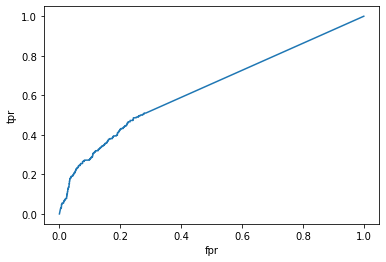

In [57]:
fpr, tpr, thresold = roc_curve(y_validation, clf_kn.predict_proba(X_validation)[:,1])
plt.plot(fpr, tpr);
plt.xlabel('fpr')
plt.ylabel('tpr')